0307(금) 1주차 과제\
핸즈온 4장 모델 훈련 p.184-203

# 4.5 규제가 있는 선형 모델

- **과대적합을 방지**하기 위해 선형 회귀 모델의 가중치를 제한하여 규제를 가함
    - 릿지 회귀
    - 라쏘 회귀
    - 엘라스틱넷

## 4.5.1 릿지 회귀

**릿지 회귀**
- 규제항 $\alpha \sum_{i=1}^{n} \theta_i^2$ 이 훈련하는 동안에만 비용 함수에 추가됨.
- 학습 알고리즘을 데이터에 맞추는 것 뿐 아니라 모델의 가중치를 가능한 작게 유지함.
- 모델의 훈련이 끝나면 규제가 없는 성능 지표로 성능을 평가함.

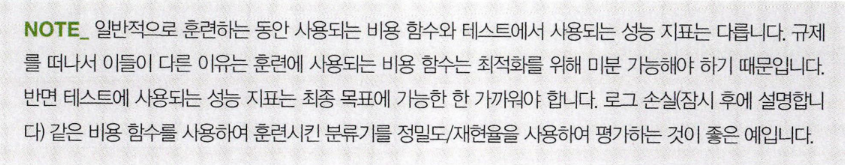

하이퍼파라미터 $$\alpha$$
- 모델을 얼마나 많이 규제할지 조절.
- 알파가 0이면 릿지 회귀는 선형 회귀와 같아짐.
- 알파가 아주 크면 모든 가중치가 0에 가까워짐, 데이터의 평균을 지나는 수평선이 됨.

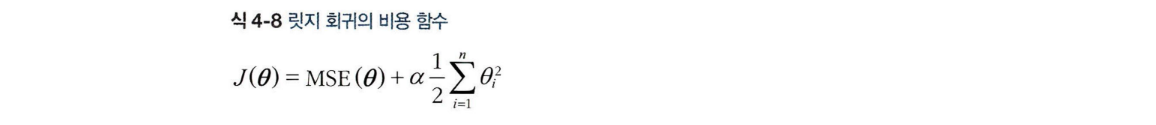

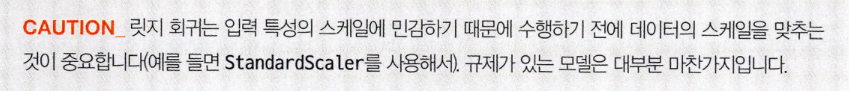

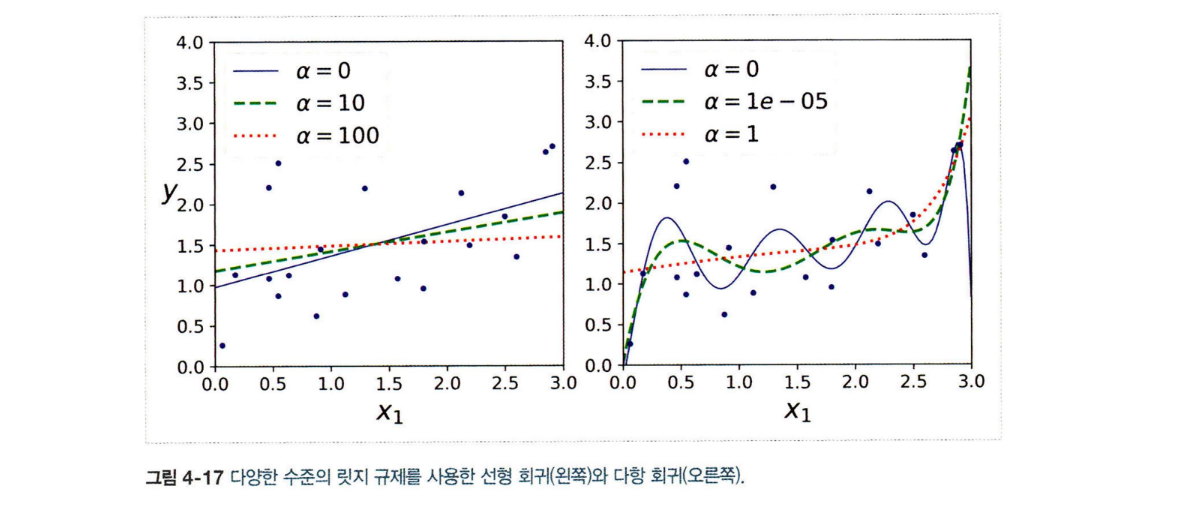

    - 왼쪽 그래프: 평범한 릿지 모델을 사용해 선형적인 예측을 만듦.
    - 오른쪽 그래프: PolynomialFeatures(degree=10)을 사용해 데이터를 확장한 후, StandardScaler를 사용해 스케일을 조정한 후 릿지 모델 사용.
    - 알파를 증가시킬수록 직선에 가까워짐(모델의 분산은 감소, 편향은 증가)

**릿지 회귀를 계산하는 방법**
- 정규방정식
- 경사 하강법
- *장단점은 이전과 같음*

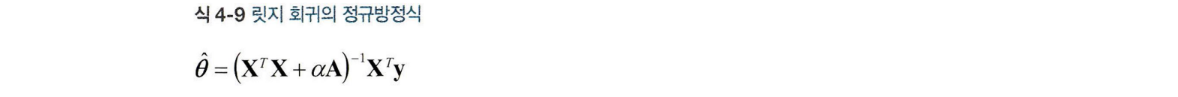

- A는 (n+1) * (n+1) 의 단위행렬

In [2]:
# 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [4]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([8.56795502])

In [5]:
# 사이킷런에서 확률적 경사 하강법을 사용한 릿지 회귀를 적용하는 예

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.703324])

- penalty 매개변수는 사용할 규제를 지정함.
- "l2" 는 SGD가 비용 함수에 가중치 벡터의 $\ell_2$
노름의 제곱을 2로 나눈 규제항을 추가하게 만듦. 즉, 릿지 회귀와 같음

## 4.5.2 라쏘 회귀

**라쏘 회귀**
- 규제된 선형 회귀
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만, $\ell_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $\ell_1$ 노름을 사용함.

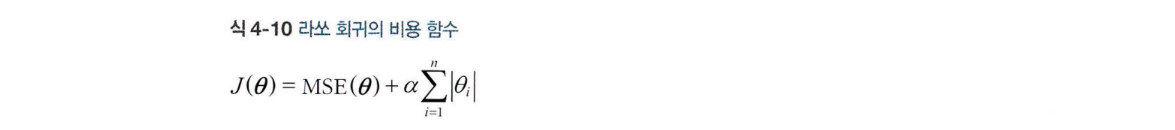

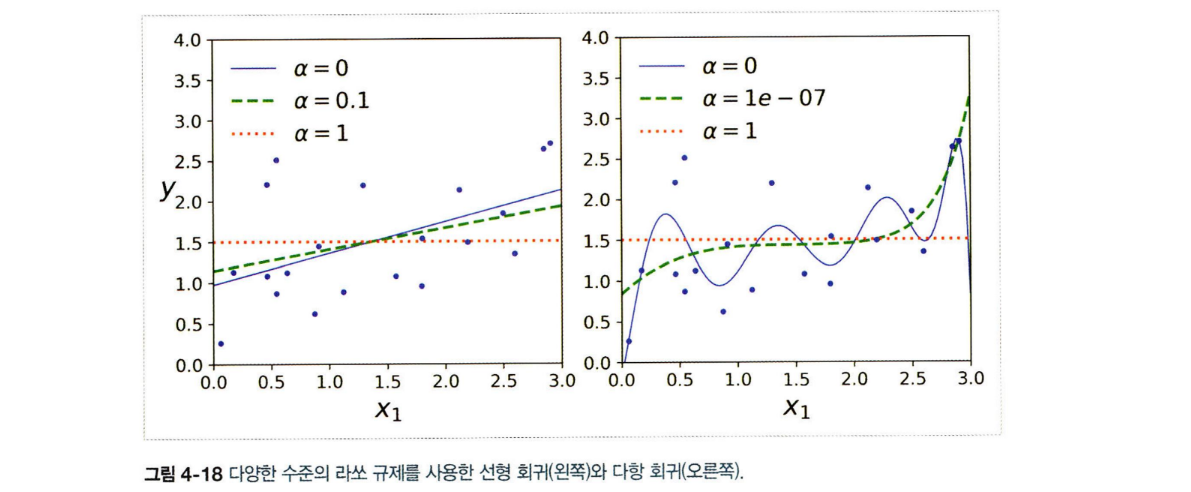

**라쏘 회귀의 중요한 특징**
- 덜 중요한 특성의 가중치를 제거함.
- 위 그림의 오른쪽 그래프에서, 점선 $(\alpha = 10^{-7})$은 2차방정식처러 보이며 거의 선형적임. 즉, 차수가 높은 특성의 가중치가 모두 0이 됨.
- 라쏘 회귀는 자동으로 특성 선택을 하고 **희소 모델**을 만듦.

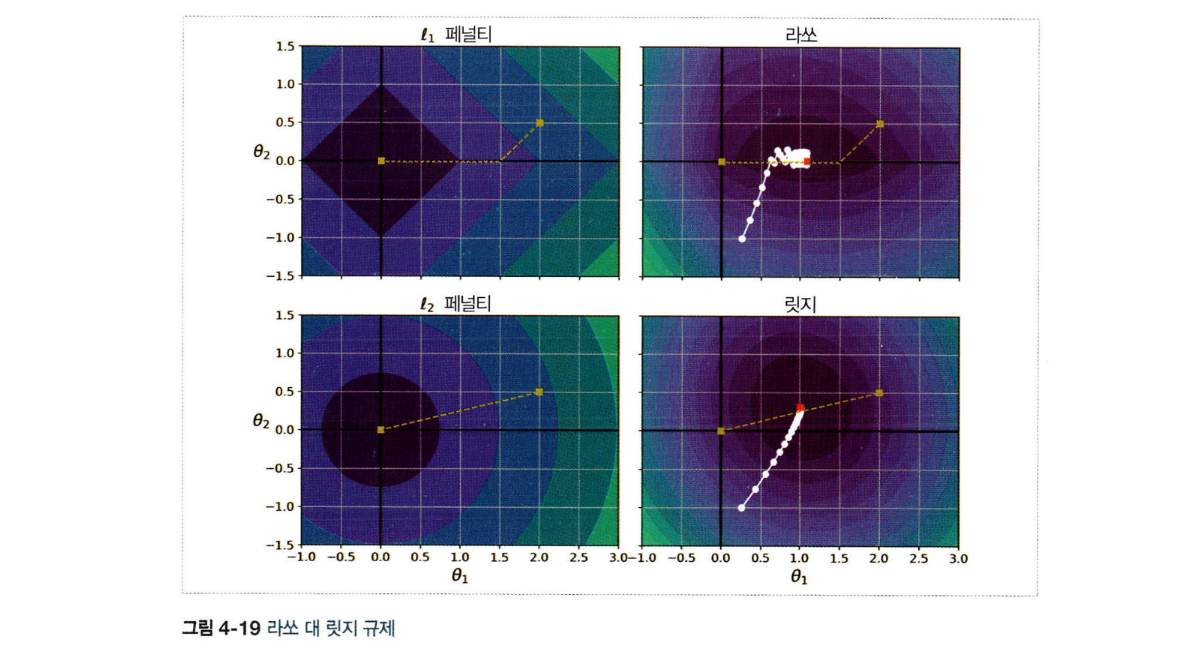

두 축은 모델 파라미터 두 개를 나타내고 배경의 등고선은 각기 다른 손실 함수를 나타냄.
- 왼쪽 위 그래프의 등고선
 -  $\ell_1$ 손실 $(|\theta_1| + |\theta_2|)$ 을 나타냄.
 - 축에 가까워지면서 선형적으로 줄어듦. 예를 들어 모델 파라미터가 $\theta_1 = 2$, $\theta_2 = 0.5$로 초기화하고 경사 하강법을 실행하면 두 파라미터가 동일하게 감소될 것(노란 점선). 따라서 $\theta_2$가 먼저 0에 도달함.($\theta_2$가 시작할 때 0에 더 가깝기 때문). 그다음 경사 하강법이 $\theta_1 = 0$에 도달할 때까지 축을 따라 내려감($\ell_1$의 그래디언트는 0에서 정의되지 않기 때문에 진동이 조금 있음. 이 지점에서 그래디언트는 -1 또는 1).

- 오른쪽 위 그래프의 등고선
  - **평균제곱오차(MSE) 손실 함수**를 나타냄.
  - 하얀 작은 원이 경사 하강법이 $\theta_1 = 0.25$, $\theta_2 =
  -1$로 초기화된 모델 파라미터를 최적화하는 과정을 보여줌.
  - 여기에서도 $\theta_2 = 0$로 빠르게 줄어들고 그다음 축을 따라 진동하면서 전역 최적점(빨간 사각형)에 도달함. $\alpha$를 증가하면 전역 최적점이 노란 점선을 따라 왼쪽으로 이동함. $\alpha$를 감소하면 전역 최적점이 오른쪽으로 이동함
  
- 이 예제에서 규제가 없는 MSE의 최적 파라미터는 $\theta_1$ = 2, $\theta_2$ = 0.5

아래 두 개의 그래프도 동일하지만 $\ell_2$ 패널티를 사용함.
- 왼쪽 아래 그래프에서 $\ell_2$ 손실은 원점에 가까울수록 줄어드는 것을 볼 수 있음. 따라서 경사 하강법이 원점까지 직선 경로를 따라 감.
- 오른쪽 아래 그래프의 등고선은 릿지 회귀의 비용 함수를 나타냄(즉, $\ell_2$ 손실을 더한 MSE 손실 함수).

**라쏘와 다른 점은 두 가지**
- 첫째, 파라미터가 전역 최적점에 가까워질수록 그래디언트가 작아짐. 따라서 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨(진동이 없음).
- 둘째, $\alpha$를 증가시킬수록 최적의 파라미터(빨간 사각형)가 원점에 더 가까워짐. 하지만 완전히 0이 되지는 않음.

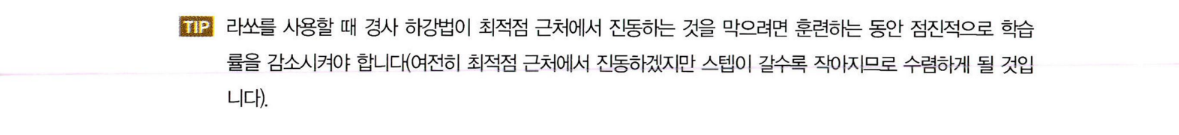

- 라쏘의 비용 함수는 $\theta_i = 0$ $(i = 1, 2, ..., n)$ 일 때에서 미분 가능하지 않음.
- 하지만 $\theta_i = 0$일 때 **서브그레이디언트 벡터**(subgradient vector) $\mathbf{g}^{35}$를 사용하면 경사 하강법을 적용하는 데 문제가 없음.


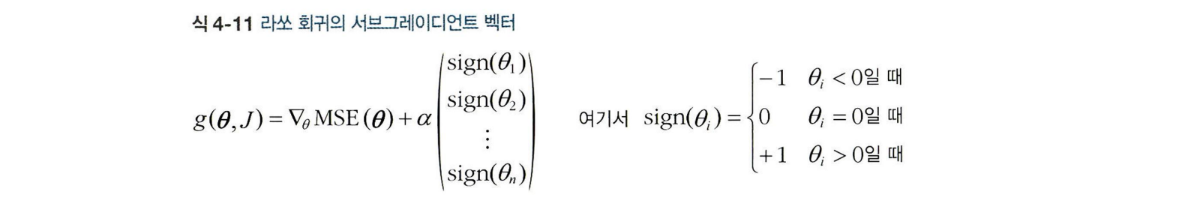

In [6]:
# 라쏘 클래스를 사용한 사이킷런 예제

from sklearn.linear_model import Lasso
import numpy as np
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.46589452])

- Lasso 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음.

## 4.5.3 엘라스틱넷

**엘라스틱넷**
- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절함.
 - r=0이면 릿지 회귀와, r=1이면 라쏘 회귀와 같음.

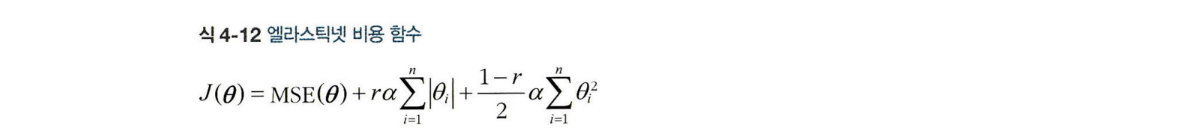

In [7]:
# 엘라스틱넷 사용 예제

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.36623812])

## 4.5.4 조기 종료

**조기 종료**
- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방식
- 검증 에러가 최솟값에 도달하면 훈련을 중지시키기

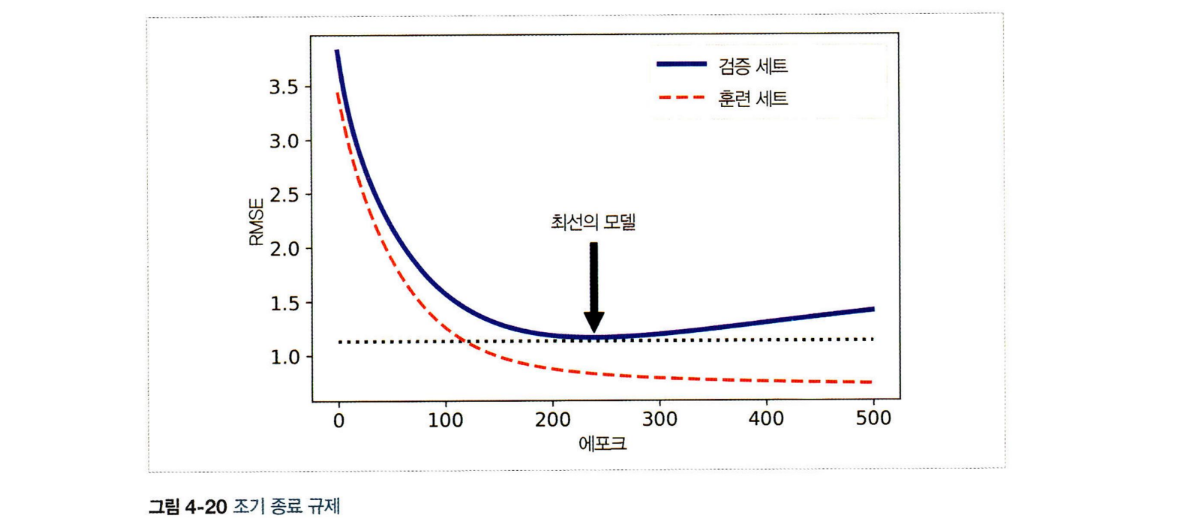

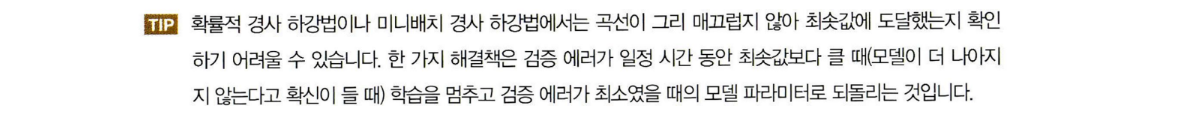

In [8]:
# 조기 종료 기본 코드

from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# 4.6 로지스틱 회귀

**로지스틱 회귀**
- 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨
- 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함
- 이진 분류기(레이블이 1인 양성클래스/0인 음성클래스)

## 4.6.1 확률 추정

**로지스틱 회귀의 작동 방식**
- 입력 특성의 가중치 합을 계산하고 편향을 더함.
- 결괏값의 로지스틱을 출력함(식 4-13)
- 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수임(식 4-14)

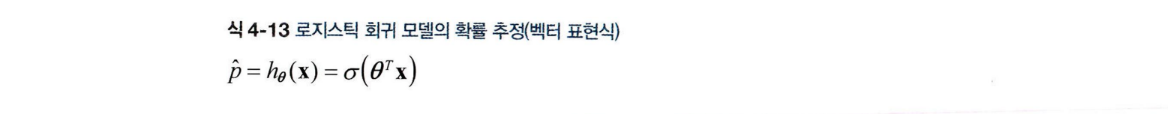

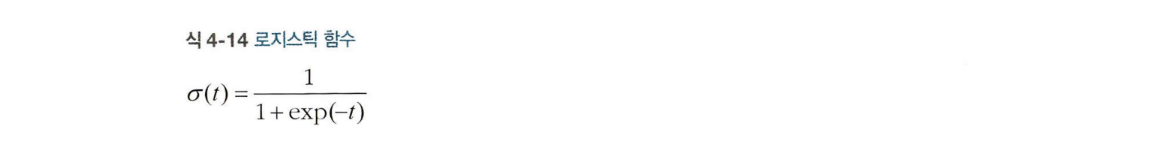

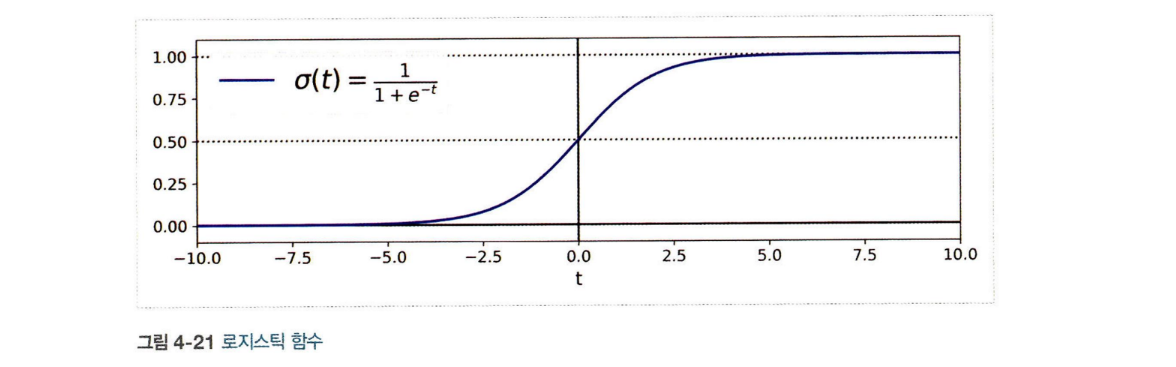

- 로지스틱 회귀 모델이 샘플 $\mathbf{x}$가 양성 클래스에 속할 확률 $\hat{p} = h_{\theta}(\mathbf{x})$를 추정하면 이에 대한 예측 $\hat{y}$을 쉽게 구할 수 있음(식 4-15).

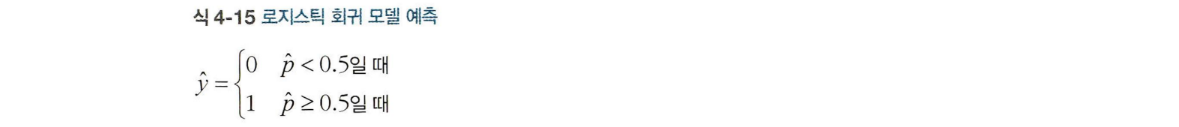

$t < 0$이면 $\sigma(t) < 0.5$이고, $t \geq 0$이면 $\sigma(t) \geq 0.5$이므로 로지스틱 회귀 모델은 $\theta^{T} \mathbf{x}$가 양수일 때 1 (양성 클래스)이라고 예측하고, 음수일 때 0 (음성 클래스)이라고 예측함.

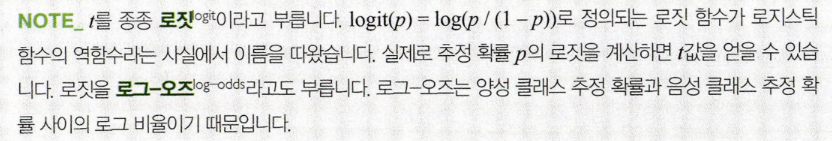

## 4.6.2 훈련과 비용 함수

**로지스틱 회귀 훈련의 목적**
- 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것

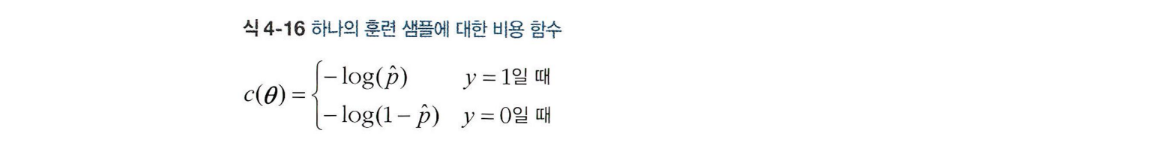

## 4.6.3 결정 경계

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [10]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

In [11]:
# 로지스틱 회귀 훈련

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

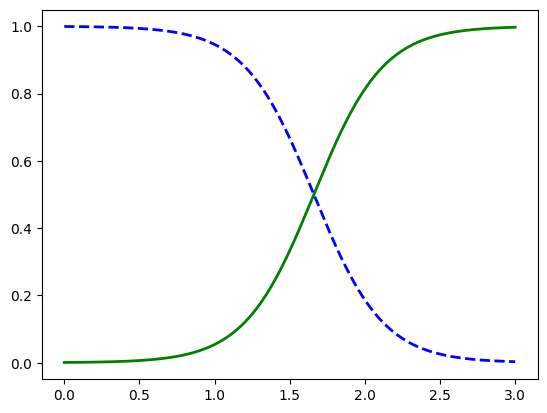

In [13]:
from matplotlib import pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

In [14]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

**소프트맥스 회귀**
- 직접 다중 클래스를 지원하도록 일반화된 로지스틱 회귀
- 개념: 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수를 적용해 각 클래스의 확률을 추정함.

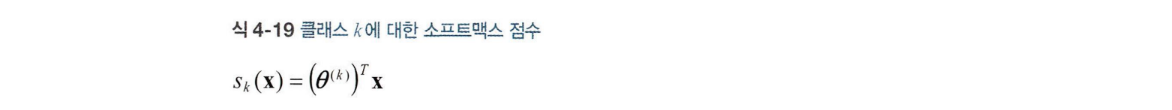

In [15]:
# 소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류하기

X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [16]:
softmax_reg.predict([[5, 2]])

array([2])

In [17]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])